# What's your business?

## [Download worked project](../../_static/generated/nace-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/nace)

So you want to be a data scientist. Good, plenty of opportunities ahead!

After graduating, you might discover though that many companies require you to actually work as a freelancer: you will just need to declare to the state which type of economic activity you are going to perform, they say. Seems easy, but you will soon encounter a pretty burocratic problem: do public institutions even _know_ what a data scientist is? If not, what is the closest category they recognize? Is there any specific _exclusion_ that would bar you from entering that category?

If you are in Europe, you will be presented with a catalog of economic activites you can choose from called [NACE](https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_NOM_DTL&StrNom=NACE_REV2&StrLanguageCode=EN&IntPcKey=&StrLayoutCode=HIERARCHIC), which is then further specialized by various states (for example Italy's catalog is called [ATECO](https://www.istat.it/it/archivio/17888))

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
nace-prj
    nace.ipynb
    nace-sol.ipynb
    NACE_REV2_20200628_213139.csv
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `nace.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`


## NACE Sections

A NACE code is subdivided in a hierarchical, four-level structure. The categories at the highest level are called _sections_, here they are:

![nace-sections](img/nace-sections.jpg)

### Section detail

If you drill down in say, section `M`, you will find something like this:

The first two digits of the code identify the _division_, the third digit identifies the _group_, and the fourth digit identifies the _class_:


![example-nace](img/example-nace.jpg)


Let's pick for example _Advertising agencies_ , which has code `73.11`:  

|Level|        |Code  |Spec | Description|
|--------|----|-|-|-|
|1|**Section** |**M**|a single alphabetic char| PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES|
|2|**Division**|**73**|two-digits|Advertising and market research|
|3|**Group**| **73.1** |three-digits, with dot after first two|Advertising|
|4|**Class**| **73.12**|four-digits, with dot after first two|Advertising agencies|


### Specifications

<div class="alert alert-warning">
            
**WARNING: CODES MAY CONTAIN ZEROES!**


**IF YOU LOAD THE CSV IN LIBREOFFICE CALC OR EXCEL, MAKE SURE IT IMPORTS EVERYTHING AS STRING!**

**WATCH OUT FOR CHOPPED ZEROES !**

</div>

**Zero examples**:

* _Veterinary activities_ contains a double zero _at the end_ : `75.00`  </li>
*  group _Manufacture of beverages_ contains a single zero at the end:  `11.0` </li>
*  _Manufacture of beer_ contains zero _inside_ : `11.05` </li>
*  _Support services to forestry_ contains a zero _at the beginning_ : `02.4` which is different from  `02.40` even if they have the same description ! 

**The section level code is not integrated in the NACE code**: For example, the activity _Manufacture of glues_ is identified by the code `20.52`, where `20` is the code for the division, `20.5` is the code for the group and `20.52` is the code of the class; section `C`, to which this class belongs, does not appear in the code itself.


**There may be gaps** (not very important for us): The divisions are coded consecutively. However, some "gaps" have been provided to allow the introduction of additional divisions without a complete change of the NACE coding. 

### NACE CSV

We provide you with a CSV  [NACE_REV2_20200628_213139.csv](NACE_REV2_20200628_213139.csv) that contains all the codes. Try to explore it with LibreOffice Calc or pandas

Here we show some relevant parts (**NOTE**: you  **DON'T** need to use pandas)

In [1]:
import pandas as pd   # we import pandas and for ease we rename it to 'pd'
import numpy as np    # we import numpy and for ease we rename it to 'np'

pd.set_option('display.max_colwidth', None)           
df = pd.read_csv('NACE_REV2_20200628_213139.csv', encoding='UTF-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Order                     996 non-null    int64 
 1   Level                     996 non-null    int64 
 2   Code                      996 non-null    object
 3   Parent                    975 non-null    object
 4   Description               996 non-null    object
 5   This item includes        778 non-null    object
 6   This item also includes   202 non-null    object
 7   Rulings                   134 non-null    object
 8   This item excludes        507 non-null    object
 9   Reference to ISIC Rev. 4  996 non-null    object
dtypes: int64(2), object(8)
memory usage: 77.9+ KB


In [2]:
df.head(5)

,Order,Level,Code,Parent,Description,This item includes,This item also includes,Rulings,This item excludes,Reference to ISIC Rev. 4
0,398481,1,A,NaN,"AGRICULTURE, FORESTRY AND FISHING","This section includes the exploitation of vegetal and animal natural resources, comprising the activities of growing of crops, raising and breeding of animals, harvesting of timber and other plants, animals or animal products from a farm or their natural habitats.",NaN,NaN,NaN,A
1,398482,2,01,A,"Crop and animal production, hunting and related service activities","This division includes two basic activities, namely the production of crop products and production of animal products, covering also the forms of organic agriculture, the growing of genetically modified crops and the raising of genetically modified animals. This division includes growing of crops in open fields as well in greenhouses.\n \nGroup 01.5 (Mixed farming) breaks with the usual principles for identifying main activity. It accepts that many agricultural holdings have reasonably balanced crop and animal production, and that it would be arbitrary to classify them in one category or the other.","This division also includes service activities incidental to agriculture, as well as hunting, trapping and related activities.",NaN,"Agricultural activities exclude any subsequent processing of the agricultural products (classified under divisions 10 and 11 (Manufacture of food products and beverages) and division 12 (Manufacture of tobacco products)), beyond that needed to prepare them for the primary markets. The preparation of products for the primary markets is included here.\n\nThe division excludes field construction (e.g. agricultural land terracing, drainage, preparing rice paddies etc.) classified in section F (Construction) and buyers and cooperative associations engaged in the marketing of farm products classified in section G. Also excluded is the landscape care and maintenance, which is classified in class 81.30.",01
2,398483,3,01.1,01,Growing of non-perennial crops,"This group includes the growing of non-perennial crops, i.e. plants that do not last for more than two growing seasons. Included is the growing of these plants for the purpose of seed production.",NaN,NaN,NaN,011
3,398484,4,01.11,01.1,"Growing of cereals (except rice), leguminous crops and oil seeds","This class includes all forms of growing of cereals, leguminous crops and oil seeds in open fields. The growing of these crops is often combined within agricultural units.\n\nThis class includes:\n- growing of cereals such as:\n . wheat\n . grain maize\n . sorghum\n . barley\n . rye\n . oats\n . millets\n . other cereals n.e.c.\n- growing of leguminous crops such as:\n . beans\n . broad beans\n . chick peas\n . cow peas\n . lentils\n . lupines\n . peas\n . pigeon peas\n . other leguminous crops\n- growing of oil seeds such as:\n . soya beans\n . groundnuts\n . castor bean\n . linseed\n . mustard seed\n . niger seed\n . rapeseed\n . safflower seed\n . sesame seed\n . sunflower seed\n . other oil seeds",NaN,NaN,"This class excludes:\n- growing of rice, see 01.12\n- growing of sweet corn, see 01.13\n- growing of maize for fodder, see 01.19\n- growing of oleaginous fruits, see 01.26",0111
4,398485,4,01.12,01.1,Growing of rice,This class includes:\n- growing of rice (including organic farming and the growing of genetically modified rice),NaN,NaN,NaN,0112


We can focus on just these columns:

In [3]:
selection = [398482,398488,398530,398608,398482,398518,398521,398567]

from IPython.display import display

example_df = df[['Order', 'Level','Code','Parent','Description','This item excludes']]
# Assuming the variable df contains the relevant DataFrame
example_df = example_df[example_df['Order'].isin(selection)]
display(example_df.style.set_properties(**{'white-space': 'pre-wrap',}))

,Order,Level,Code,Parent,Description,This item excludes
1,398482,2,01,A,"Crop and animal production, hunting and related service activities","Agricultural activities exclude any subsequent processing of the agricultural products (classified under divisions 10 and 11 (Manufacture of food products and beverages) and division 12 (Manufacture of tobacco products)), beyond that needed to prepare them for the primary markets. The preparation of products for the primary markets is included here. The division excludes field construction (e.g. agricultural land terracing, drainage, preparing rice paddies etc.) classified in section F (Construction) and buyers and cooperative associations engaged in the marketing of farm products classified in section G. Also excluded is the landscape care and maintenance, which is classified in class 81.30."
7,398488,4,01.15,01.1,Growing of tobacco,"This class excludes: - manufacture of tobacco products, see 12.00"
37,398518,4,01.64,01.6,Seed processing for propagation,"This class excludes: - growing of seeds, see groups 01.1 and 01.2 - processing of seeds to obtain oil, see 10.41 - research to develop or modify new forms of seeds, see 72.11"
40,398521,2,02,A,Forestry and logging,"Excluded is further processing of wood beginning with sawmilling and planing of wood, see division 16."
49,398530,2,03,A,Fishing and aquaculture,"This division does not include building and repairing of ships and boats (30.1, 33.15) and sport or recreational fishing activities (93.19). Processing of fish, crustaceans or molluscs is excluded, whether at land-based plants or on factory ships (10.20)."
86,398567,4,09.90,09.9,Support activities for other mining and quarrying,"This class excludes: - operating mines or quarries on a contract or fee basis, see division 05, 07 or 08 - specialised repair of mining machinery, see 33.12 - geophysical surveying services, on a contract or fee basis, see 71.12"
127,398608,4,11.03,11.0,Manufacture of cider and other fruit wines,"This class excludes: - merely bottling and labelling, see 46.34 (if performed as part of wholesale) and 82.92 (if performed on a fee or contract basis)"


## 1. Extracting codes

Let's say European Commission wants to review the catalog to simplify it. One way to do it, could be to look for codes that have lots of exclusions, the reasoning being that trying to explain somebody something by stating what it is _not_ often results in confusion.

## 1.1 is_nace

Implement following function. NOTE: it was not explicitly required in the original exam but could help detecting words. 

In [4]:

def is_nace(word):
    """Given a word, RETURN True if the word is a NACE code, else otherwise"""
    
    # we could implement it also with regexes, here we use explicit methods:
    if len(word) == 1:
        return word.isalpha() and word.isupper()
    elif len(word) == 2:
        return word.isdigit()
    elif len(word) == 4:
        return word[:2].isdigit() and word[2] == '.' and word[3].isdigit()
    elif len(word) == 5:
        return word[:2].isdigit() and word[2] == '.' and word[3:].isdigit()
    else:
        return False
    
    
assert is_nace('0') == False
assert is_nace('01') == True
assert is_nace('A') == True   # this is a Section
assert is_nace('AA') == False
assert is_nace('a') == False
assert is_nace('01.2') == True
assert is_nace('01.20') == True
assert is_nace('03.25') == True
assert is_nace('02.753') == False
assert is_nace('300') == False
assert is_nace('5012') == False

In [4]:

def is_nace(word):
    """Given a word, RETURN True if the word is a NACE code, else otherwise"""
    raise Exception('TODO IMPLEMENT ME !')
    
assert is_nace('0') == False
assert is_nace('01') == True
assert is_nace('A') == True   # this is a Section
assert is_nace('AA') == False
assert is_nace('a') == False
assert is_nace('01.2') == True
assert is_nace('01.20') == True
assert is_nace('03.25') == True
assert is_nace('02.753') == False
assert is_nace('300') == False
assert is_nace('5012') == False

## 1.2 extract_codes

Implement following function which extracts codes from `This item excludes` column cells. For examples, see asserts.

In [5]:
def extract_codes(text):
    """Extracts all the NACE codes from given text (a single string), 
       and RETURN a list of the codes
              
       - also extracts section letters
       - list must have *no* duplicates
    """
    
    ret = []
    
    words = [word.strip(';,.:()"\'') for word in text.replace('-',' ').split()]
    for i in range(len(words)):         
        
        if i < len(words) - 1 \
            and words[i].lower() == 'section' \
            and len(words[i+1]) == 1 \
            and words[i+1][0].isalpha():
            
            if words[i+1] not in ret:
                ret.append(words[i+1])
        else:            
            if is_nace(words[i]) and words[i] not in ret:
                ret.append(words[i])
            
    return ret
    

assert extract_codes('group 02.4') == ['02.4']
assert extract_codes('class 02.40') == ['02.40']
assert extract_codes('.') == []
assert extract_codes('exceeding 300 litres') == []
assert extract_codes('see 46.34') == ['46.34']
assert extract_codes('divisions 10 and 11') == ['10','11']
assert extract_codes('(10.20)') == ['10.20']
assert extract_codes('(30.1, 33.15)') == ['30.1', '33.15']
assert extract_codes('as outlined in groups 85.1-85.4, i.e.') == ['85.1','85.4']
assert extract_codes('see 25.99 see 25.99') == ['25.99']  # no duplicates
assert extract_codes('section A') == ['A']
assert extract_codes('in section G. Also') == ['G']
assert extract_codes('section F (Construction)') == ['F']
assert extract_codes('section A, section A') == ['A']

In [5]:
def extract_codes(text):
    """Extracts all the NACE codes from given text (a single string), 
       and RETURN a list of the codes
              
       - also extracts section letters
       - list must have *no* duplicates
    """
    raise Exception('TODO IMPLEMENT ME !')

assert extract_codes('group 02.4') == ['02.4']
assert extract_codes('class 02.40') == ['02.40']
assert extract_codes('.') == []
assert extract_codes('exceeding 300 litres') == []
assert extract_codes('see 46.34') == ['46.34']
assert extract_codes('divisions 10 and 11') == ['10','11']
assert extract_codes('(10.20)') == ['10.20']
assert extract_codes('(30.1, 33.15)') == ['30.1', '33.15']
assert extract_codes('as outlined in groups 85.1-85.4, i.e.') == ['85.1','85.4']
assert extract_codes('see 25.99 see 25.99') == ['25.99']  # no duplicates
assert extract_codes('section A') == ['A']
assert extract_codes('in section G. Also') == ['G']
assert extract_codes('section F (Construction)') == ['F']
assert extract_codes('section A, section A') == ['A']

In [6]:
# MORE REALISTIC asserts: 

t01 = """Agricultural activities exclude any subsequent processing of the 
agricultural products (classified under divisions 10 and 11 (Manufacture of food 
products and beverages) and division 12 (Manufacture of tobacco products)), beyond 
that needed to prepare them for the primary markets. The preparation of products for
the primary markets is included here.

The division excludes field construction (e.g. agricultural land terracing, 
drainage, preparing rice paddies etc.) classified in section F (Construction) and buyers 
and cooperative associations engaged in the marketing of farm products classified 
in section G. Also excluded is the landscape care and maintenance,
which is classified in class 81.30.
"""
assert extract_codes(t01) == ['10','11','12','F','G','81.30']

t01_15 = """This class excludes:
- manufacture of tobacco products, see 12.00
"""
assert extract_codes(t01_15) == ['12.00']

t03 = """This division does not include building and repairing of ships and 
boats (30.1, 33.15) and sport or recreational fishing activities (93.19).
Processing of fish, crustaceans or molluscs is excluded, whether at land-based
plants or on factory ships (10.20).
"""

assert extract_codes(t03) == ['30.1', '33.15','93.19','10.20']

t11_03 = """This class excludes:
- merely bottling and labelling, see 46.34 (if performed as part of wholesale) 
and 82.92 (if performed on a fee or contract basis)
"""
assert extract_codes(t11_03) == ['46.34', '82.92']


t01_64 = """This class excludes:
- growing of seeds, see groups 01.1 and 01.2
- processing of seeds to obtain oil, see 10.41
- research to develop or modify new forms of seeds, see 72.11
"""
assert extract_codes(t01_64) == ['01.1','01.2','10.41','72.11']

t02 = """Excluded is further processing of wood beginning with sawmilling and planing of wood, 
see division 16.
"""
assert extract_codes(t02) == ['16']

t09_90 = """This class excludes:
- operating mines or quarries on a contract or fee basis, see division 05, 07 or 08
- specialised repair of mining machinery, see 33.12
- geophysical surveying services, on a contract or fee basis, see 71.12
"""
assert extract_codes(t09_90) == ['05','07','08','33.12','71.12']

## 2. build_db

Given a filepath pointing to a NACE CSV, reads the CSV and RETURN a dictionary mapping codes to dictionaries which hold the code descriptionn and a field with the list of excluded codes, for example:

```python
{'01': {'description': 'Crop and animal production, hunting and related service activities',
  'exclusions': ['10', '11', '12', 'F', 'G', '81.30']},
 '01.1': {'description': 'Growing of non-perennial crops', 'exclusions': []},
 '01.11': {'description': 'Growing of cereals (except rice), leguminous crops and oil seeds',
  'exclusions': ['01.12', '01.13', '01.19', '01.26']},
 '01.12': {'description': 'Growing of rice', 'exclusions': []},
 '01.13': {'description': 'Growing of vegetables and melons, roots and tubers',
  'exclusions': ['01.28', '01.30']},
 ...
 ...
}
```

The complete desired output is in file [expected_db.py](expected_db.py)

In [7]:
def build_db(filepath):
    
    ret = {}
    import csv
    with open(filepath, encoding='utf-8', newline='') as f:    
        my_reader = csv.DictReader(f, delimiter=',')
        for d in my_reader:
            diz = {'description' : d['Description'],
                   'exclusions' : extract_codes(d['This item excludes'])}
            ret[d['Code']] = diz
    return ret
    
    
activities_db = build_db('NACE_REV2_20200628_213139.csv')  
#activities_db

In [7]:
def build_db(filepath):
    raise Exception('TODO IMPLEMENT ME !')
    
activities_db = build_db('NACE_REV2_20200628_213139.csv')  
#activities_db

## 3. plot

Implement function `plot` which given a `db` as created at previous point and a code `level` among 1,2,3,4, plots the number of exclusions for all codes of that **exact** level (so do not include sublevels in the sum), sorted in reversed order. 

- remember to plot title, notice it should shows the type of level (could be Section, Division, Group, or Class)
- try to display labels nicely as in the example output

(if you look at the graph, apparently European Union has a hard time defining what an artist is :-)

<div class="alert alert-warning">

**IMPORTANT: IF you couldn't implement the function** `build_db` **,  you will still find the complete desired output** in  [expected_db.py](expected_db.py), to import it write: `from expected_db import activities_db`
</div>

![expected-division-exclusions.png](expected-division-exclusions.png)

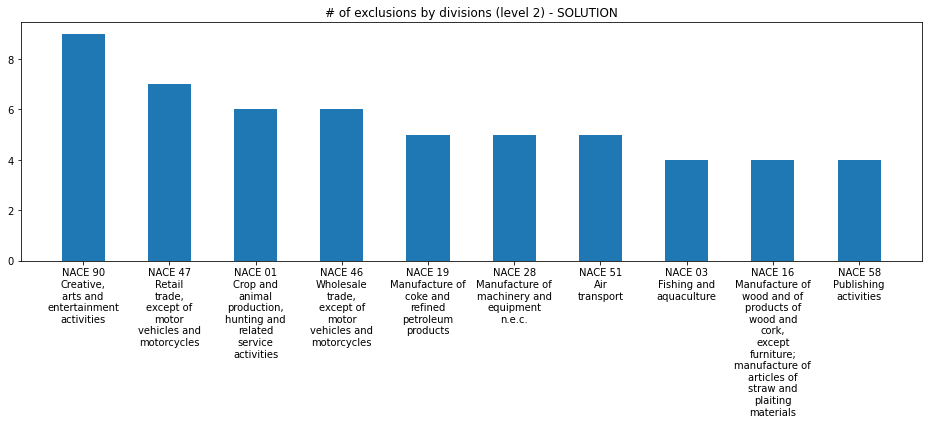

In [8]:

%matplotlib inline
def plot(db, level):    
    
    import matplotlib.pyplot as plt
    
    
    coords = [(code, len(db[code]['exclusions'])) for code in db if len(code.replace('.','')) == level]
    coords.sort(key=lambda c: c[1], reverse=True)
    
    coords = coords[:10]
            
    xs = [c[0] for c in coords]
    ys = [c[1] for c in coords]

    fig = plt.figure(figsize=(13,6))  # width: 10 inches, height 3 inches


    plt.bar(xs, ys, 0.5, align='center')
    
    def fix_label(label):
        # coding horror, sorry
        return label.replace(' ','\n').replace('\nand\n',' and\n').replace('\nof\n',' of\n')
    
    plt.xticks(xs, ['NACE ' + c[0] + '\n' + fix_label(db[c[0]]['description']) for c in coords])   
    
    level_names = {
        1:'Section',
        2:'division',
        3:'Group',
        4:'Class'
    }
    plt.title("# of exclusions by %ss (level %s) - SOLUTION" % (level_names[level], level))
    #plt.xlabel('level_names[level]')
    #plt.ylabel('y')
    fig.tight_layout()
    
    plt.show()
    
    

#Uncomment *only* if you had problems with build_db
#from expected_db import activities_db  

#1 Section 
#2 Division
#3 Group
#4 Class
plot(activities_db, 2)

In [8]:

%matplotlib inline
def plot(db, level):    
    
    import matplotlib.pyplot as plt
    raise Exception('TODO IMPLEMENT ME !')

#Uncomment *only* if you had problems with build_db
#from expected_db import activities_db  

#1 Section 
#2 Division
#3 Group
#4 Class
plot(activities_db, 2)